In [1]:
"""                             iSIM_MODULES
    ----------------------------------------------------------------------
    
    Miranda-Quintana Group, Department of Chemistry, University of Florida 
    
    ----------------------------------------------------------------------
    
    Please, cite the original paper on iSIM:

    ----------------------------------------------------------------------

    This notebook contains an example on how to perform different types of sampling 
    using iSIM as metric. 

    """

'                             iSIM_MODULES\n    ----------------------------------------------------------------------\n    \n    Miranda-Quintana Group, Department of Chemistry, University of Florida \n    \n    ----------------------------------------------------------------------\n    \n    Please, cite the original paper on iSIM:\n\n    ----------------------------------------------------------------------\n\n    This notebook contains an example on how to perform different types of sampling \n    using iSIM as metric. \n\n    '

In [2]:
from iSIM.div import *
from iSIM.sampling import *
from iSIM.comp import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the fingerprints 
fingerprints = np.load('CHEMBL214_Ki_fps.npy') # Fingerprints can be generated as shown in the iSIM_example.ipynb notebook

# Define the similarity index you want to used to perform the sampling 
n_ary = 'JT'

# Define the percentage of the dataset you want to sample
percentage = 10

# Get the sampled indexes with each methods
medoid_samp = medoid_sampling(fingerprints, n_ary, percentage)
outlier_samp = outlier_sampling(fingerprints, n_ary, percentage)
extremes_samp = extremes_sampling(fingerprints, n_ary, percentage)
strat_samp = stratified_sampling(fingerprints, n_ary, percentage)
quota_samp = quota_sampling(fingerprints, n_ary, percentage)
#div_samp = diversity(fingerprints, n_ary=n_ary, percentage=percentage) ## This method scales quadratically, can take a long time
#maxmin_samp = diversity(fingerprints, n_ary=n_ary, percentage=percentage, method='bmax') ## This method scales quadratically, can take a long time

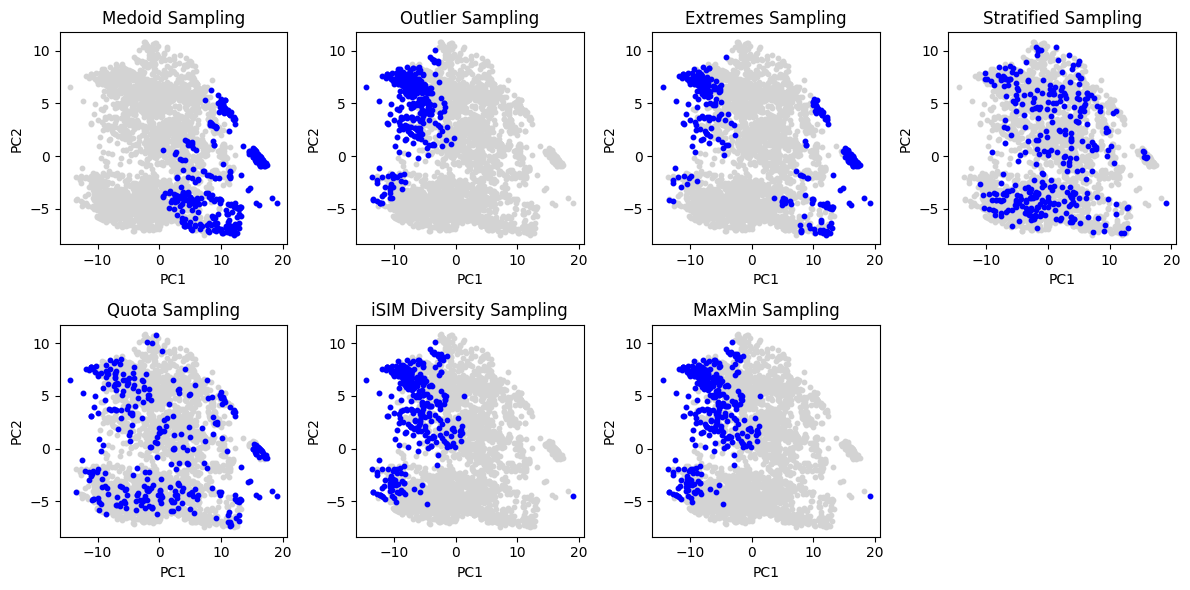

In [6]:
# Do PCA to visualize the sampled indexes
pca = PCA(n_components=2)
pca.fit(fingerprints)
X = pca.transform(fingerprints)

# Plot the sampled indexes in 7 different subplots
plt.figure(figsize=(12, 6))

plt.subplot(241)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[medoid_samp, 0], X[medoid_samp, 1], c='blue', s=10)
plt.title('Medoid Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()


plt.subplot(242)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[outlier_samp, 0], X[outlier_samp, 1], c='blue', s=10)
plt.title('Outlier Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

plt.subplot(243)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[extremes_samp, 0], X[extremes_samp, 1], c='blue', s=10)
plt.title('Extremes Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

plt.subplot(244)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[strat_samp, 0], X[strat_samp, 1], c='blue', s=10)
plt.title('Stratified Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

plt.subplot(245)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[quota_samp, 0], X[quota_samp, 1], c='blue', s=10)
plt.title('Quota Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

# Load the diversity and maxmin sampling data, we will not plot them because they take a long time to compute
div_samp = np.load('CHEMBL214_RDKIT_JT_isim.npy')
maxmin_samp = np.load('CHEMBL214_RDKIT_JT_bmax.npy')

plt.subplot(246)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[div_samp, 0], X[div_samp, 1], c='blue', s=10)
plt.title('iSIM Diversity Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(247)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[maxmin_samp, 0], X[maxmin_samp, 1], c='blue', s=10)
plt.title('MaxMin Sampling')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.savefig('CHEMBL214_PCA.png', dpi = 400)
plt.show()

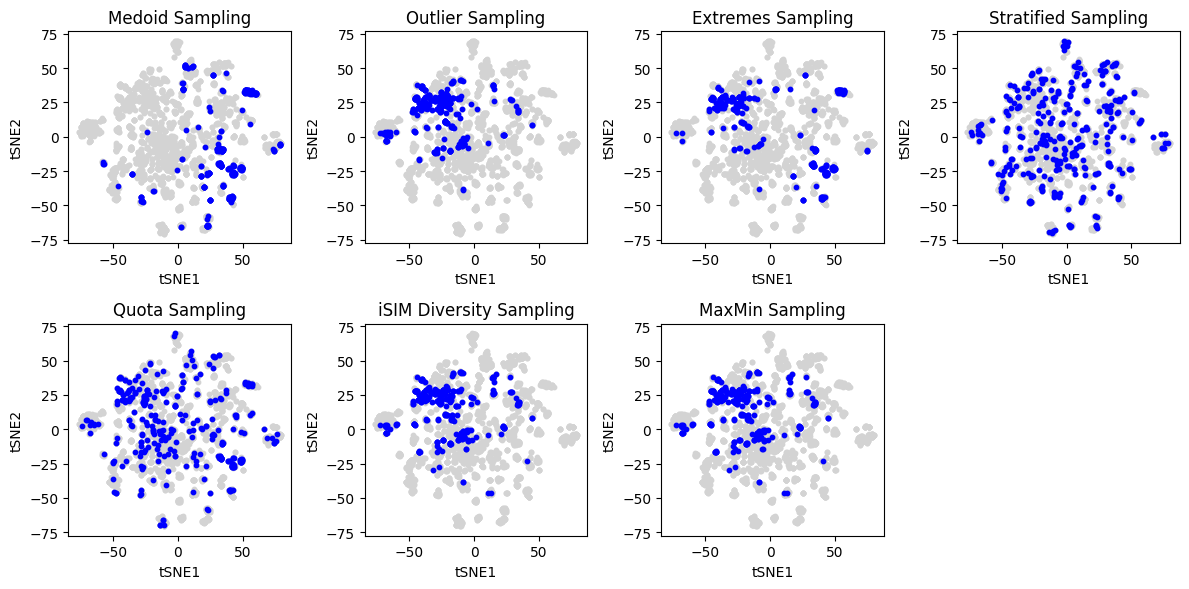

In [7]:
# Do tSNE to visualize the sampled indexes
tsne = TSNE(n_components=2)
X = tsne.fit_transform(fingerprints)

# Plot the sampled indexes in 7 different subplots
plt.figure(figsize=(12, 6))
plt.subplot(241)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[medoid_samp, 0], X[medoid_samp, 1], c='blue', s=10)
plt.title('Medoid Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(242)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[outlier_samp, 0], X[outlier_samp, 1], c='blue', s=10)
plt.title('Outlier Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(243)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[extremes_samp, 0], X[extremes_samp, 1], c='blue', s=10)
plt.title('Extremes Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(244)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[strat_samp, 0], X[strat_samp, 1], c='blue', s=10)
plt.title('Stratified Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(245)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[quota_samp, 0], X[quota_samp, 1], c='blue', s=10)
plt.title('Quota Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(246)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[div_samp, 0], X[div_samp, 1], c='blue', s=10)
plt.title('iSIM Diversity Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.subplot(247)
plt.scatter(X[:, 0], X[:, 1], c='lightgray', s=10)
plt.scatter(X[maxmin_samp, 0], X[maxmin_samp, 1], c='blue', s=10)
plt.title('MaxMin Sampling')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.tight_layout()

plt.savefig('CHEMBL214_tSNE.png', dpi = 400)
plt.show()

In [8]:
# Get the isim values for each sampling method
medoid_isim = calculate_isim(fingerprints[medoid_samp], n_objects= len(medoid_samp), n_ary = n_ary)
outlier_isim = calculate_isim(fingerprints[outlier_samp], n_objects= len(outlier_samp), n_ary = n_ary)
extremes_isim = calculate_isim(fingerprints[extremes_samp], n_objects= len(extremes_samp), n_ary = n_ary)
batch_isim = calculate_isim(fingerprints[strat_samp], n_objects= len(strat_samp), n_ary = n_ary)
rep_isim = calculate_isim(fingerprints[quota_samp], n_objects= len(quota_samp), n_ary = n_ary)
div_isim = calculate_isim(fingerprints[div_samp], n_objects= len(div_samp), n_ary = n_ary)
maxmin_isim = calculate_isim(fingerprints[maxmin_samp], n_objects= len(maxmin_samp), n_ary = n_ary)
isim = calculate_isim(fingerprints, n_objects= len(fingerprints), n_ary = n_ary)

print('Medoid Sampling ISIM:', np.round(medoid_isim, 5))
print('Outlier Sampling ISIM:', np.round(outlier_isim, 5))
print('Extremes Sampling ISIM:', np.round(extremes_isim, 5))
print('Stratified Sampling ISIM:', np.round(batch_isim, 5))
print('Quota Sampling ISIM:', np.round(rep_isim, 5))
print('Diversity Sampling ISIM:', np.round(div_isim, 5))
print('MaxMin Sampling ISIM:', np.round(maxmin_isim, 5))
print('Total ISIM:', np.round(isim, 5))


Medoid Sampling ISIM: 0.52405
Outlier Sampling ISIM: 0.21217
Extremes Sampling ISIM: 0.33403
Stratified Sampling ISIM: 0.33066
Quota Sampling ISIM: 0.32896
Diversity Sampling ISIM: 0.20132
MaxMin Sampling ISIM: 0.20132
Total ISIM: 0.33036
